In [186]:
# wczytanie danych
import pandas

cancer_data = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data', 
                              header=None, sep=',')
cancer_data.shape

(286, 10)

In [187]:
cancer_data.head()

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [188]:
# przygotowanie danych
X = cancer_data.iloc[:,1:10]
Y = cancer_data.iloc[:,0]

X2 = pandas.get_dummies(X)

X2.head()

,6,1_20-29,1_30-39,1_40-49,1_50-59,1_60-69,1_70-79,2_ge40,2_lt40,2_premeno,...,7_left,7_right,8_?,8_central,8_left_low,8_left_up,8_right_low,8_right_up,9_no,9_yes
0,3,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
2,2,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,2,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [189]:
# podział na treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y, train_size=0.9, random_state=1)

e:\kurs-ml\venv\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [197]:
# przygotowanie modelu
from sklearn import tree
#model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 8)
model = tree.DecisionTreeClassifier()

In [198]:
# trenowanie modelu
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [199]:
# predykcja na danych testowych
y_pred = model.predict(X_test)

In [200]:
# wyniki
model.score(X_test, y_test)

0.6896551724137931

In [201]:
# MACIERZ POMYŁEK
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [202]:
# wypisanie
tn, fp, fn, tp

(13, 5, 4, 7)

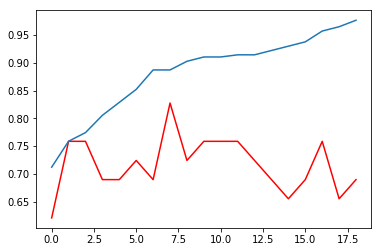

In [204]:
# poprawa wyniku poprzez zmianie max_depth

test_scores = []
train_scores = []
for i in range(1, 20):
    clf_gin = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = i)
    clf_gin.fit(X_train, y_train)
    test_scores.append(clf_gin.score(X_test, y_test))
    train_scores.append(clf_gin.score(X_train, y_train))
    
import matplotlib.pyplot as plt
plt.plot(test_scores, color = "red")
plt.plot(train_scores)